<a href="https://colab.research.google.com/github/sbowma15/image_processing_tool/blob/main/image_processing_tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

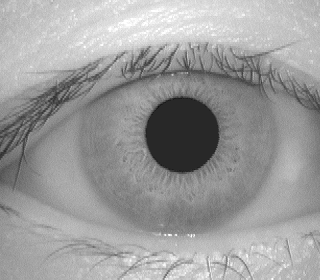

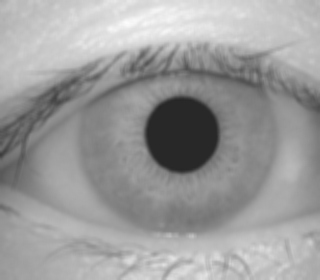

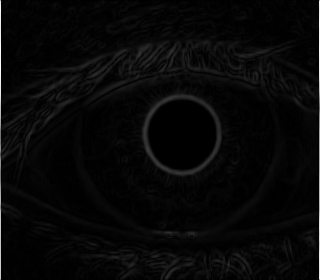

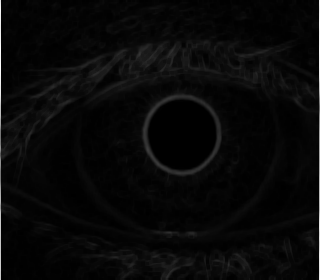

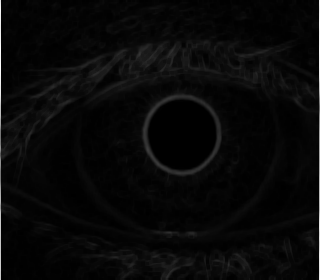

AttributeError: ignored

In [ ]:
import numpy as np
import cv2
from  google.colab.patches import cv2_imshow
from scipy.signal import convolve2d

#################################################
#Smoothing
#################################################

#Reads the image in from hardcoded path(Can be made to be dynamic later)
img=cv2.imread('/content/sample_data/iris.bmp')

im = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

dst = cv2.GaussianBlur(im, (5,5), cv2.BORDER_DEFAULT )


cv2_imshow(im)
cv2_imshow(dst)

##################################################
#Using sobel for edge detection
##################################################

sobel_vert = np.array([[-1.0, 0.0, 1.0],
                       [-2.0, 0.0, 2.0],
                       [-1.0, 0.0, 1.0]])

sobel_horiz = sobel_vert.T

d_horiz = convolve2d(dst, sobel_horiz, mode='same', boundary = 'symm', fillvalue=0)
d_vert = convolve2d(dst, sobel_vert, mode='same',boundary='fill', fillvalue=0)

grad = np.sqrt(np.square(d_horiz)+np.square(d_vert))

grad *= 255.0/np.max(grad)

cv2_imshow(grad)

###################################################
#Attempt at finding contour
###################################################

#grad = cv2.threshhold(grad, 120,255,1) #inverts threshhold(light obj on dark)

#makes the shape larger and fills some holes
grad = cv2.dilate(grad, None)

#Dilate reverts the shape, makes shape smaller
grad = cv2.erode(grad, None)

cv2_imshow(grad)

grad = np.float32(grad)

cv2_imshow(grad)

grad, contours, heirarchy = cv2.startFindContours(grad, cv2.RETR_FLOODFILL, cv2.CHAIN_APPROX_SIMPLE)

rc = cv2.minAreaRect(contours[0])

box = cv2.boxPoints(rc)

for p in box:
    pt = (p[0],p[1])
    print(pt)
    cv2.circle(circ1,pt,5,(200,0,0),2)


#(x,y),radius = cv2.minEnclosingCircle(grad)
#center = (int(x),int(y))
#radius = int(radius)
#grad = cv2.circle(grad,center,radius,(0,255,0),2)

cv2_imshow(circ1)






























def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[0]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output
